### 1. NumPy 数组（ndarray）

NumPy 的核心是 `ndarray` 类型的多维数组，支持高效的数值计算。

- 一维数组：类似列表 `[1, 2, 3]`
- 二维数组：矩阵形式 `[[1, 2], [3, 4]]`
- 多维数组：支持高维张量

NumPy 提供 `np.array()` 函数来创建数组。


In [1]:
import numpy as np

# 一维数组
a = np.array([1, 2, 3])
print("一维数组 a:", a)

# 二维数组
b = np.array([[1, 2, 3], [4, 5, 6]])
print("二维数组 b:\n", b)

# 查看数据类型
print("a 的类型:", type(a))
print("b 的维度:", b.ndim)
print("b 的形状:", b.shape)


一维数组 a: [1 2 3]
二维数组 b:
 [[1 2 3]
 [4 5 6]]
a 的类型: <class 'numpy.ndarray'>
b 的维度: 2
b 的形状: (2, 3)


### 2. 创建数组（array, arange, linspace）

- `np.array()`：将列表或嵌套列表转为数组
- `np.arange(start, stop, step)`：创建等差数组（不包含 stop）
- `np.linspace(start, stop, num)`：创建等间距数组（包含 stop）

这些函数是 NumPy 中最常用的数组创建方法。


In [4]:
# array
a = np.array([[1, 2], [3, 4]])

# arange
b = np.arange(0, 10, 2)

# linspace
c = np.linspace(0, 1, 5)

print("array:\n", a)
print("arange:", b)
print("linspace:", c)

array:
 [[1 2]
 [3 4]]
arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 3. 数组索引与切片

NumPy 支持类似 Python 列表的索引方式，同时还提供多维索引、布尔索引、花式索引等。

常见操作：
- `a[1]`：取第 2 个元素
- `a[1:3]`：切片（左闭右开）
- `a[0, 2]`：二维数组中第 1 行第 3 列
- `a[:, 1]`：取所有行的第 2 列


In [6]:
a = np.array([[10, 20, 30],
              [40, 50, 60],
              [70, 80, 90]])

print("原始数组:\n", a)

# 访问元素：第2行第3列
print("a[1, 2]:", a[1, 2])

# 取第1行
print("a[0]:", a[0])

# 取所有行的第2列
print("a[:, 1]:", a[:, 1])

# 取左上角2x2子矩阵
print("a[:2, :2]:\n", a[:2, :2])

原始数组:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]
a[1, 2]: 60
a[0]: [10 20 30]
a[:, 1]: [20 50 80]
a[:2, :2]:
 [[10 20]
 [40 50]]
[40 50 60]


### 4. 数组形状操作（reshape, ravel, flatten）

- `reshape`：改变数组形状（不改变数据）
- `ravel`：降为一维，返回原数组的视图（view）
- `flatten`：降为一维，返回副本（copy）

#### 📌 ravel vs flatten 区别总结：

| 特性            | `ravel()`         | `flatten()`       |
|------------------|--------------------|---------------------|
| 返回类型         | 视图（View）        | 副本（Copy）        |
| 是否复制数据     | 否                  | 是                  |
| 效率             | 更快               | 较慢               |
| 修改后影响原数组 | 可能（若连续）       | 不会               |

常用于矩阵转置、数据预处理等任务。


In [11]:
a = np.array([[1, 2, 3], [4, 5, 6]])

# reshape 为 (3, 2)
b = a.reshape((3, 2))
print("reshape:\n", b)

# ravel 返回视图（view）
r = a.ravel()
r[0] = 100  # 修改 r 会影响 a
print("ravel:", r)

# flatten 返回副本（copy）
f = a.flatten()
f[1] = 999  # 修改 f 不会影响 a
print("flatten:", f)

# 查看原始数组 a 是否被 ravel 或 flatten 修改
print("原始数组 a:\n", a)

reshape:
 [[1 2]
 [3 4]
 [5 6]]
ravel: [100   2   3   4   5   6]
flatten: [100 999   3   4   5   6]
原始数组 a:
 [[100   2   3]
 [  4   5   6]]


### 5. 数学运算（加减乘除，dot, sum, mean, std）

NumPy 支持向量化运算（比循环更快）：
- `+`, `-`, `*`, `/` 逐元素操作
- `dot()`：矩阵乘法或内积
- `sum()`, `mean()`, `std()`：求和、平均、标准差


In [9]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# 元素级运算
print("加法:\n", a + b)
print("乘法:\n", a * b)

# 矩阵乘法
print("矩阵乘法 dot:\n", np.dot(a, b))

# 聚合函数
print("总和:", a.sum())
print("平均值:", a.mean())
print("标准差:", a.std())


加法:
 [[ 6  8]
 [10 12]]
乘法:
 [[ 5 12]
 [21 32]]
矩阵乘法 dot:
 [[19 22]
 [43 50]]
总和: 10
平均值: 2.5
标准差: 1.118033988749895


### 6. 广播机制（Broadcasting）

广播机制允许不同形状的数组进行运算，NumPy 会自动扩展维度，使其能逐元素运算。

**广播规则简述：**
1. 从尾部（右侧）开始比较两个数组的形状；
2. 若两个维度相同，或其中一个为 1，则可进行广播；
3. 否则，抛出 `ValueError`。

#### 📌 常见广播场景：
- 向量加标量：`[1, 2, 3] + 1`
- 矩阵加行向量：`(3, 3) + (1, 3)`
- 矩阵加列向量：`(3, 3) + (3, 1)`

广播通常在机器学习的数据标准化、批量操作中非常常用。


In [12]:
import numpy as np

# 原始数组 a: 形状为 (3, 3)
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# 行向量 b: (1, 3)
b = np.array([[10, 20, 30]])

# 列向量 c: (3, 1)
c = np.array([[1],
              [2],
              [3]])

# 广播加法：矩阵 + 行向量
res1 = a + b
print("a + b (行向量广播):\n", res1)

# 广播加法：矩阵 + 列向量
res2 = a + c
print("a + c (列向量广播):\n", res2)

# 与标量运算
res3 = a * 2
print("a * 2 (标量广播):\n", res3)

# 验证广播不修改原数组
print("原始数组 a:\n", a)


a + b (行向量广播):
 [[11 22 33]
 [14 25 36]
 [17 28 39]]
a + c (列向量广播):
 [[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]
a * 2 (标量广播):
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
原始数组 a:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


### 7. 线性代数模块（np.linalg）

NumPy 的 `linalg` 模块提供了常用的线性代数函数：

| 函数         | 功能说明                     |
|--------------|------------------------------|
| `dot`        | 点积（向量）或矩阵乘法（矩阵） |
| `inv`        | 求矩阵的逆                   |
| `eig`        | 求特征值和特征向量           |
| `solve`      | 解线性方程组 Ax = b          |

> 注意：这些函数只适用于**二维数组（矩阵）**，并要求满足对应的数学前提（如可逆、方阵等）。


In [13]:
import numpy as np

# 定义一个二维矩阵 A 和向量 b
A = np.array([[2, 1],
              [1, 3]])

b = np.array([8, 13])

# 矩阵乘法（dot）
x = np.array([1, 2])
print("A.dot(x):", np.dot(A, x))

# 求逆矩阵
A_inv = np.linalg.inv(A)
print("A 的逆矩阵:\n", A_inv)

# 验证 A @ A_inv 应该是单位阵
identity = np.dot(A, A_inv)
print("A @ A_inv:\n", identity)

# 解线性方程 Ax = b
solution = np.linalg.solve(A, b)
print("解 Ax=b，x =", solution)

# 求特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(A)
print("特征值:", eig_vals)
print("特征向量:\n", eig_vecs)


A.dot(x): [4 7]
A 的逆矩阵:
 [[ 0.6 -0.2]
 [-0.2  0.4]]
A @ A_inv:
 [[ 1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00]]
解 Ax=b，x = [2.2 3.6]
特征值: [1.38196601 3.61803399]
特征向量:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


### 8. 随机模块（np.random）

NumPy 的 `random` 模块用于生成随机数、抽样模拟、重排等操作，常见函数如下：

| 函数                | 功能说明                       |
|---------------------|--------------------------------|
| `seed(n)`           | 固定随机数种子，保证结果可复现  |
| `rand(d0, ..., dn)` | 生成 [0,1) 间均匀分布（浮点）    |
| `randn(d0, ..., dn)`| 标准正态分布 N(0,1)（浮点）     |
| `randint(low, high)`| 生成指定范围内整数              |
| `choice(a)`         | 从 a 中随机抽样                |
| `shuffle(a)`        | 原地打乱数组（修改原数组）       |

> 使用 `np.random.seed()` 可以让实验结果“可复现”，尤其用于调试或模型训练。


In [14]:
import numpy as np

# 固定种子，确保每次结果一致
np.random.seed(42)

# rand: 生成 2x3 的 [0, 1) 随机浮点数
print("rand:\n", np.random.rand(2, 3))

# randn: 标准正态分布（均值0，方差1）
print("randn:\n", np.random.randn(3))

# randint: 随机整数（不含上限）
print("randint:", np.random.randint(10, 20, size=(2, 4)))

# choice: 从列表中随机选取元素
items = ['apple', 'banana', 'orange']
sample = np.random.choice(items, size=5, replace=True)
print("choice:", sample)

# shuffle: 原地打乱一维数组
arr = np.arange(10)
np.random.shuffle(arr)
print("shuffle 后 arr:", arr)

# 注意：shuffle 会修改原数组！


rand:
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]
randn:
 [ 1.57921282  0.76743473 -0.46947439]
randint: [[14 10 19 15]
 [18 10 19 12]]
choice: ['orange' 'apple' 'orange' 'apple' 'orange']
shuffle 后 arr: [8 2 5 7 3 1 9 0 4 6]


### 9. 快速傅里叶变换（np.fft）

NumPy 的 `np.fft` 模块用于进行傅里叶变换，将信号从 **时域** 转换到 **频域**。

常用函数：

| 函数           | 功能说明                          |
|----------------|-----------------------------------|
| `np.fft.fft()` | 快速傅里叶变换（时域 → 频域）     |
| `np.fft.ifft()`| 逆傅里叶变换（频域 → 时域）       |
| `np.fft.fftfreq(n)`| 返回频率对应的坐标轴（横轴） |

> 通常用于分析信号的频率成分，比如音频中的“低频 / 高频”变化。


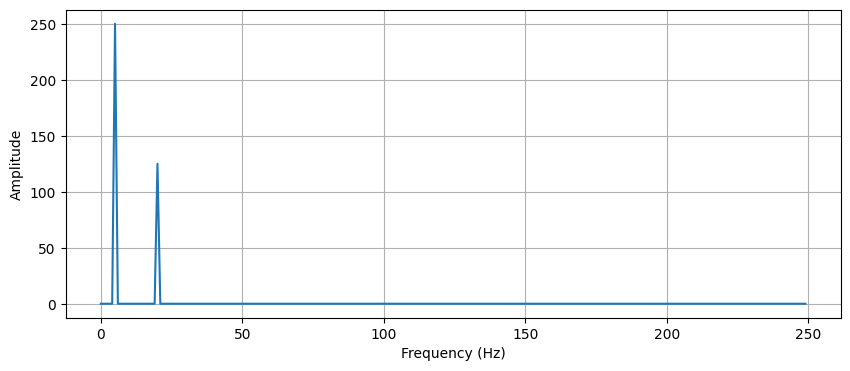

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 构造一个混合信号：两个正弦波叠加
t = np.linspace(0, 1, 500, endpoint=False)  # 时间轴
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# 快速傅里叶变换
freq_domain = np.fft.fft(signal)

# 计算频率坐标
freqs = np.fft.fftfreq(len(t), d=1/500)  # 采样率为 500Hz

# 画出频域图像
plt.figure(figsize=(10, 4))
plt.plot(freqs[:250], np.abs(freq_domain)[:250])  # 只画正频率部分
plt.title("")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
